C:\Users\mantu\AppData\Local\Temp\ipykernel_25208\1288837693.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(O_dummy))


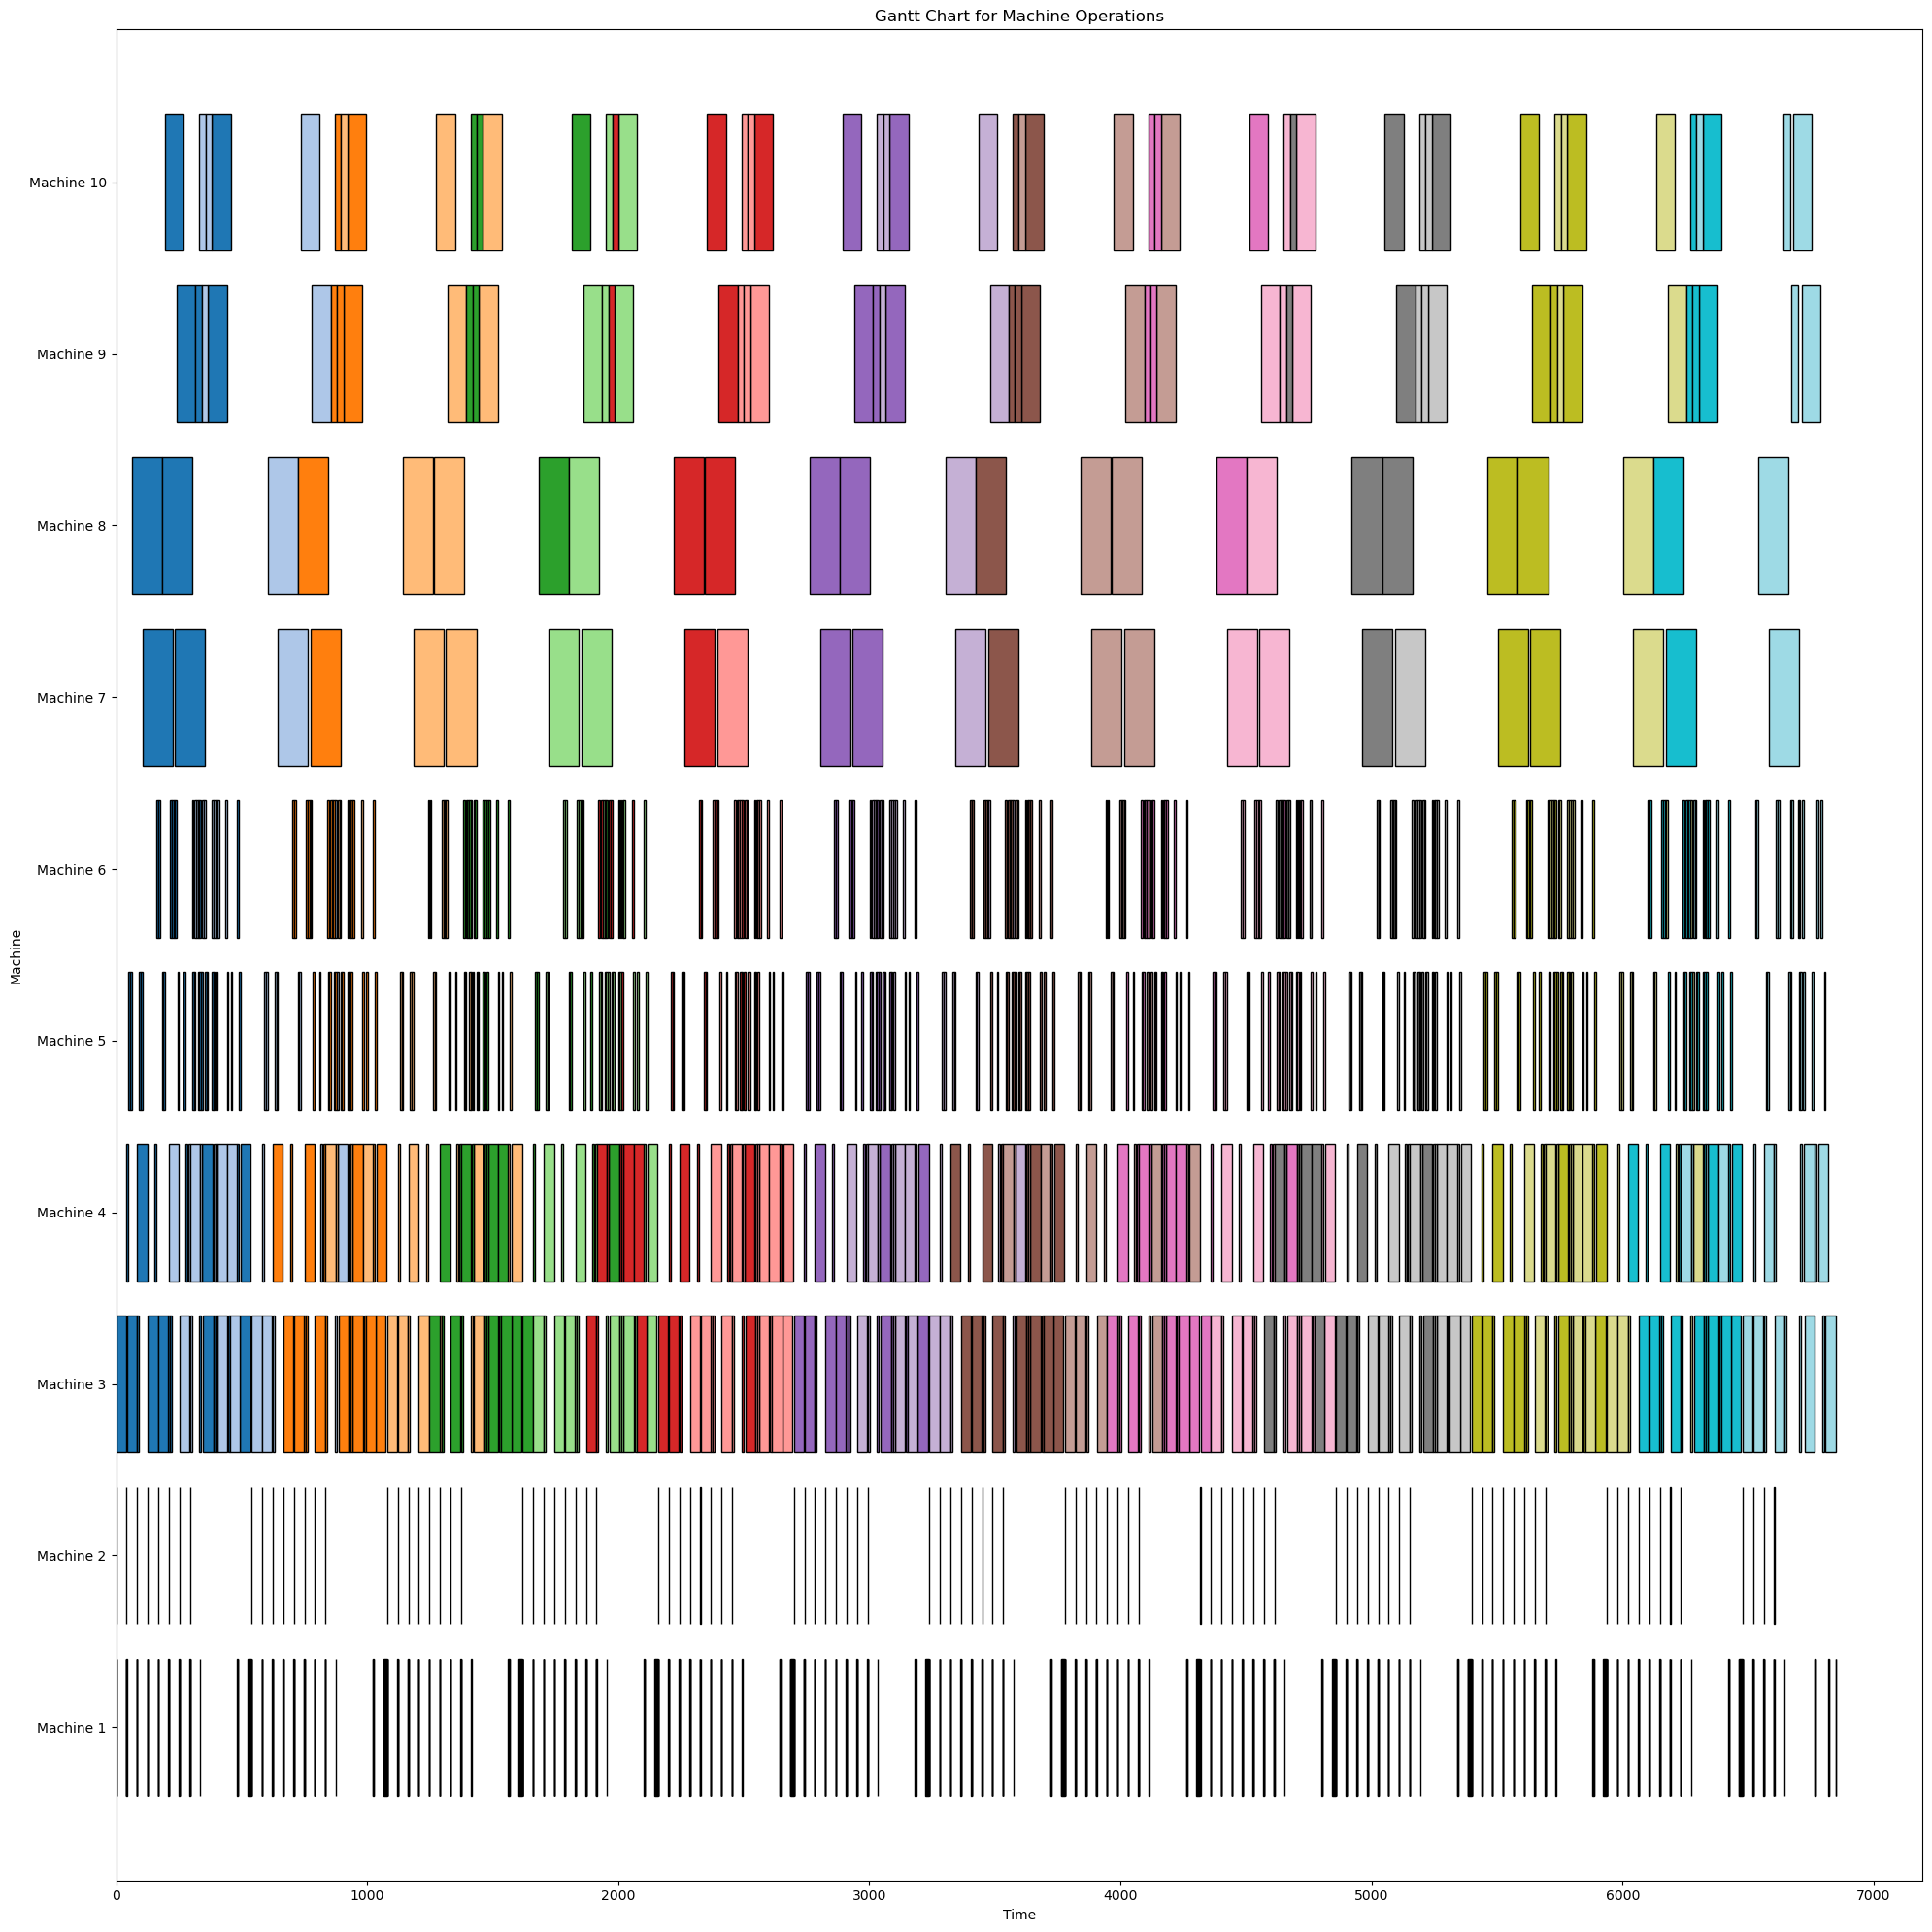

In [11]:
import csv
import matplotlib.pyplot as plt
import numpy as np

def read_csv(file_path):
    with open(file_path, 'r') as file:
        reader = csv.reader(file)
        return [list(map(float, row)) for row in reader]

def plot_gantt_chart(O_dummy, t_dummy, e_dummy, num_machines=10):
    # Initialize the figure and axis
    fig, ax = plt.subplots(figsize=(20, 20))

    # Define colors for different operations
    colors = plt.cm.get_cmap('tab20', len(O_dummy))

    # Create a dictionary to store operation labels for the legend
    legend_labels = {}

    # Plot the Gantt chart
    for machine in range(num_machines):
        for i in range(len(O_dummy)):
            if O_dummy[i][machine] == 1.0:
                start = t_dummy[i]
                end = e_dummy[i]
                operation_name = f'Op {i+1}'
                color = colors(i)

                # Plot each operation as a horizontal bar
                ax.barh(machine, end-start, left=start, color=color, edgecolor='black')

                # Store the operation name and color for the legend
                if operation_name not in legend_labels:
                    legend_labels[operation_name] = color

    # Label the axes
    ax.set_xlabel('Time')
    ax.set_ylabel('Machine')
    ax.set_yticks(np.arange(num_machines))
    ax.set_yticklabels([f'Machine {i+1}' for i in range(num_machines)])
    ax.set_title('Gantt Chart for Machine Operations')

    # Create a legend
    #legend_patches = [plt.Line2D([0], [0], color=color, lw=4, label=label) for label, color in legend_labels.items()]
    #ax.legend(handles=legend_patches, title="Operations", loc='upper right', bbox_to_anchor=(1.15, 1))

    plt.tight_layout()
    plt.show()

# File paths
o_dummy_file = 'O_dummy.csv'
t_dummy_file = 't_dummy.csv'
e_dummy_file = 'e_dummy.csv'

# Read data from CSV files
O_dummy = read_csv(o_dummy_file)
t_dummy = np.array(read_csv(t_dummy_file)).flatten()
e_dummy = np.array(read_csv(e_dummy_file)).flatten()

# Plot the Gantt chart
plot_gantt_chart(O_dummy, t_dummy, e_dummy)
